Load in the Dataset in your Jupyter Notebook

# Task 1: Become familiar with the dataset
The following describes the dataset variables:

The following describes the dataset variables:

- **CRIM** - per capita crime rate by town
- **ZN** - proportion of residential land zoned for lots over 25,000 sq.ft.
- **INDUS** - proportion of non-retail business acres per town.
- **CHAS** - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- **NOX** - nitric oxides concentration (parts per 10 million)
- **RM** - average number of rooms per dwelling
- **AGE** - proportion of owner-occupied units built prior to 1940
- **DIS** - weighted distances to five Boston employment centres
- **RAD** - index of accessibility to radial highways
- **TAX** - full-value property-tax rate per $10,000

- **PTRATIO** - pupil-teacher ratio by town
- **LSTAT** - % lower status of the population
- **MEDV** - Median value of owner-occupied homes in $1000's


-----------------------------------------------

# Task 2: Create or Login into IBM cloud to use Watson Studio.

-----------------------------------------------

# Task 3: Load in the Dataset in your Jupyter Notebook

In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd

boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df = pd.read_csv(boston_url)

-----------------------------------------------

# Task 4: Generate Descriptive Statistics and Visualizations

For all visualizations, please include a title in each graph and appropriate labels

Generate the following and explain your findings:

- For the "Median value of owner-occupied homes" provide a **boxplot**

- Provide a  **bar plot** for the Charles river variable

- Provide a **boxplot** for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

- Provide a **scatter plot** to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

- Create a **histogram** for the pupil to teacher ratio variable

In [6]:
pip install matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


## 1. Boxplot for the Median Value of Owner-Occupied Homes (MEDV)

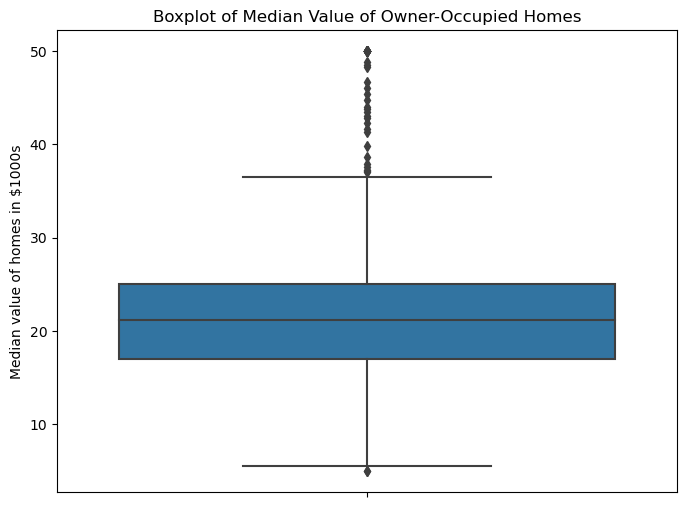

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming boston_df is your DataFrame
plt.figure(figsize=(8, 6))
sns.boxplot(y='MEDV', data=boston_df)
plt.title('Boxplot of Median Value of Owner-Occupied Homes')
plt.ylabel('Median value of homes in $1000s')
plt.show()


**Findings:** This boxplot will show the distribution of the median value of owner-occupied homes. Key things to look for include the median (middle line of the box), the interquartile range (IQR, the box's height), and any potential outliers (points beyond the whiskers).

## 2. Bar Plot for the Charles River Variable (CHAS)

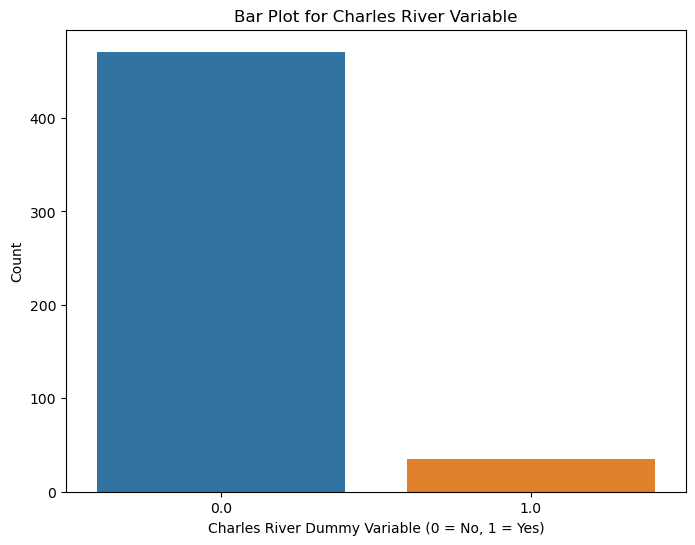

In [8]:
plt.figure(figsize=(8, 6))
sns.countplot(x='CHAS', data=boston_df)
plt.title('Bar Plot for Charles River Variable')
plt.xlabel('Charles River Dummy Variable (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


**Findings:** This bar plot will show the number of tracts that bound the Charles River versus those that do not. It's a simple representation of the distribution of this categorical variable.

## 3. Boxplot for MEDV vs. AGE

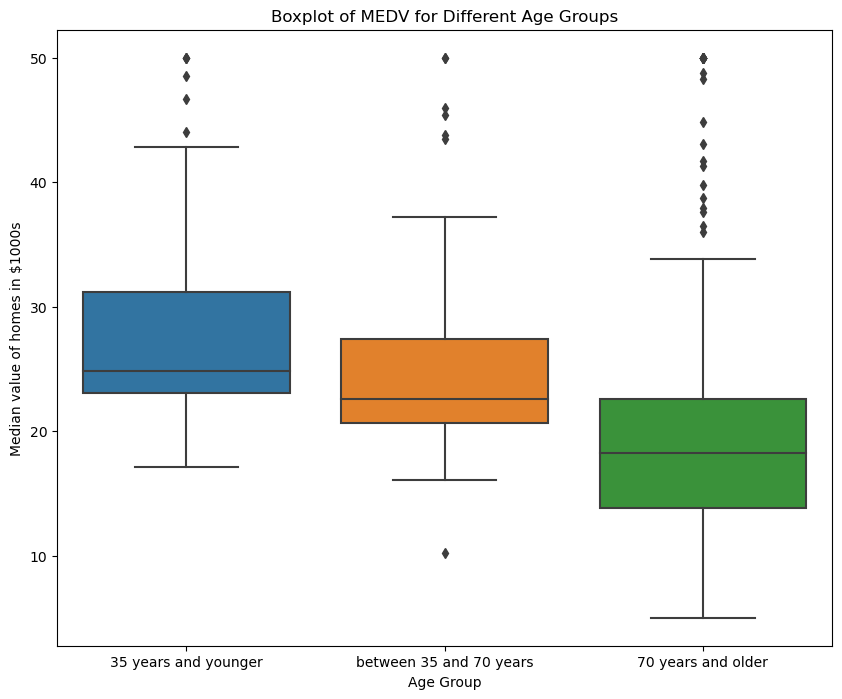

In [9]:
boston_df['AGE_GROUP'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100], labels=['35 years and younger', 'between 35 and 70 years', '70 years and older'], include_lowest=True)

plt.figure(figsize=(10, 8))
sns.boxplot(x='AGE_GROUP', y='MEDV', data=boston_df)
plt.title('Boxplot of MEDV for Different Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Median value of homes in $1000s')
plt.show()


**Findings:** This plot will help in understanding how the median value of homes varies with the age of the buildings. Look for differences in median values and variances between the age groups.

## 4. Scatter Plot for Nitric Oxide Concentrations vs. Non-retail Business Acres

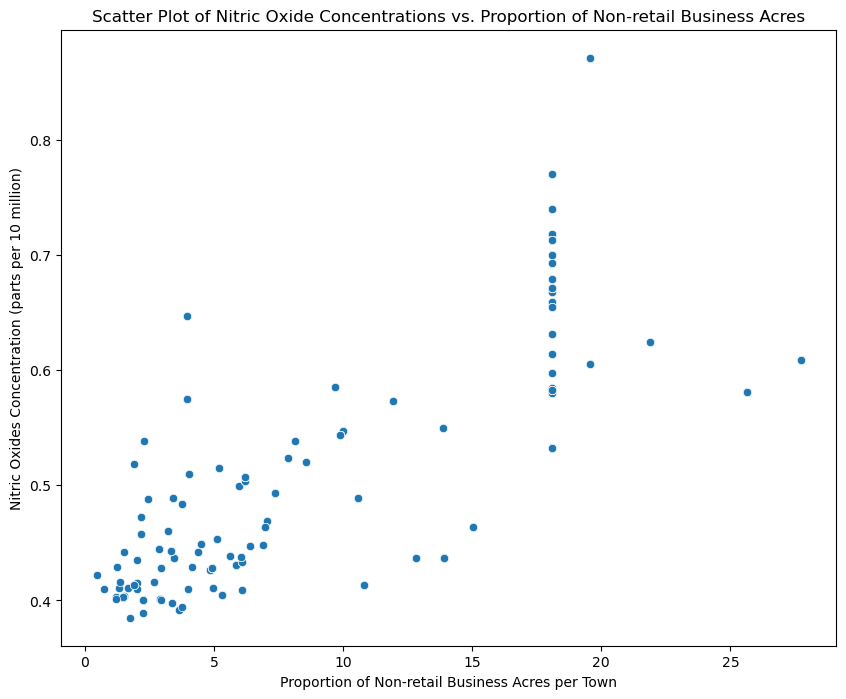

In [10]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
plt.title('Scatter Plot of Nitric Oxide Concentrations vs. Proportion of Non-retail Business Acres')
plt.xlabel('Proportion of Non-retail Business Acres per Town')
plt.ylabel('Nitric Oxides Concentration (parts per 10 million)')
plt.show()


**Findings:** This scatter plot will show if there's any apparent relationship between nitric oxide concentrations and the proportion of non-retail business acres. A pattern or trend (like a linear or non-linear relationship) might suggest a correlation between these variables.

## 5. Histogram for the Pupil-Teacher Ratio Variable (PTRATIO)

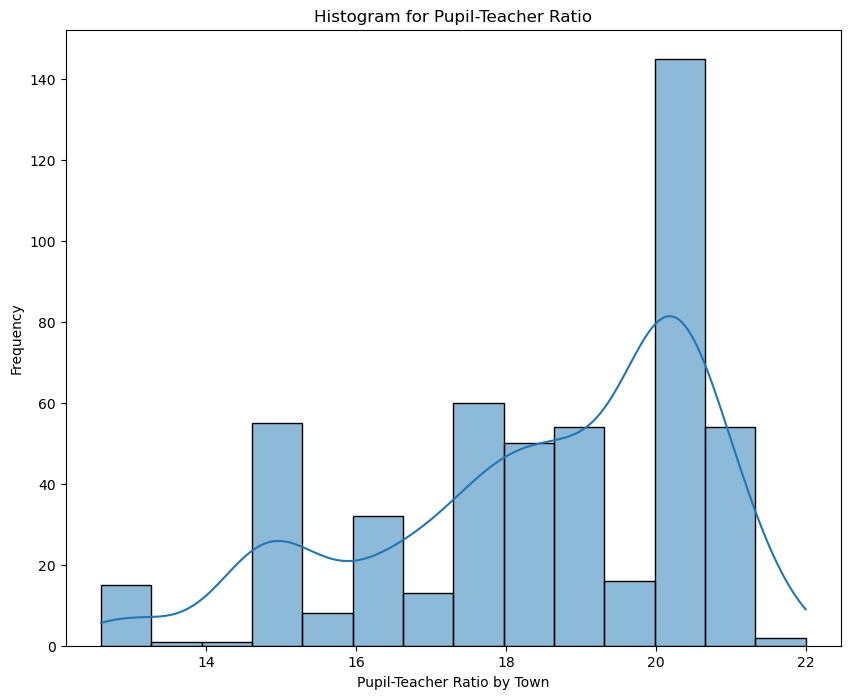

In [12]:
plt.figure(figsize=(10, 8))
sns.histplot(boston_df['PTRATIO'], kde=True)
plt.title('Histogram for Pupil-Teacher Ratio')
plt.xlabel('Pupil-Teacher Ratio by Town')
plt.ylabel('Frequency')
plt.show()


**Findings:** This histogram will show the distribution of the pupil-teacher ratio across towns. Look for the most common ratios and the spread of the data.

------------------------------------------------------------

# Task 5: Use the appropriate tests to answer the questions provided.

#### For each of the following questions;

- Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

- Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

- Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

- What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)


#### Be sure to:

1. State your hypothesis.

2. Use α = 0.05

3. Perform the test Statistics.

4. State the conclusion from the test.

## Statistical Analysis Questions

1. **T-test for Independent Samples**

   **Question:** Is there a significant difference in median value of houses bounded by the Charles river or not?

   **Hypotheses:**
   - Null hypothesis (H0): There is no difference in median value of houses bounded by the Charles river and those that are not.
   - Alternative hypothesis (H1): There is a difference in median value of houses bounded by the Charles river and those that are not.

   **Test:**
   - Perform an independent samples t-test comparing the median values of houses (MEDV) for the two groups (bounded by Charles river vs. not).

   **Conclusion:**
   - If p-value < 0.05: Reject H0, indicating a significant difference in median values.
   - If p-value ≥ 0.05: Fail to reject H0, indicating no significant difference in median values.

2. **ANOVA**

   **Question:** Is there a difference in Median values of houses (MEDV) for each proportion of owner-occupied units built prior to 1940 (AGE)?

   **Hypotheses:**
   - Null hypothesis (H0): There are no differences in MEDV across the different age categories.
   - Alternative hypothesis (H1): There is a difference in MEDV for at least one age category.

   **Test:**
   - Conduct an ANOVA test comparing MEDV across the different age categories.

   **Conclusion:**
   - If p-value < 0.05: Reject H0, suggesting a significant difference in MEDV for at least one age category.
   - If p-value ≥ 0.05: Fail to reject H0, suggesting no significant differences in MEDV across age categories.

3. **Pearson Correlation**

   **Question:** Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?

   **Hypotheses:**
   - Null hypothesis (H0): There is no correlation between nitric oxide concentrations and proportion of non-retail business acres per town.
   - Alternative hypothesis (H1): There is a correlation between nitric oxide concentrations and proportion of non-retail business acres per town.

   **Test:**
   - Perform a Pearson correlation test between nitric oxide concentrations (NOX) and proportion of non-retail business acres (INDUS).

   **Conclusion:**
   - If p-value < 0.05: Reject H0, indicating a significant correlation between NOX and INDUS.
   - If p-value ≥ 0.05: Fail to reject H0, indicating no significant correlation.

4. **Regression Analysis**

   **Question:** What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes?

   **Hypotheses:**
   - Null hypothesis (H0): The weighted distance to the five Boston employment centres has no impact on the median value of owner-occupied homes.
   - Alternative hypothesis (H1): The weighted distance to the five Boston employment centres has an impact on the median value of owner-occupied homes.

   **Test:**
   - Conduct a linear regression analysis with the median value of owner-occupied homes (MEDV) as the dependent variable and the weighted distance to employment centres (DIS) as the independent variable.

   **Conclusion:**
   - If the p-value for the DIS coefficient in the regression is < 0.05: Reject H0, suggesting that the weighted distance has a significant impact on MEDV.
   - If the p-value is ≥ 0.05: Fail to reject H0, suggesting no significant impact.

------------------------------------------------

# Author

Kamil Wakulik